# <center> NUMERICAL ANALYSIS

## <span style='color:blue'> Theme 1 - Direct Methods for Solving Linear Methods

#### <span style='color:red'> [1.1] Find prime numbers in a range

In [3]:
def allprimes(lower, upper):
    print("Prime numbers between", lower, "and", upper, "are:")
    for num in range(lower,upper+1):
        if num > 1: #prime numbers are greater than 1
            for i in range(2,num):
                if (num % i) == 0: #insure remainder = 0
                    break
            else:
                print(num)
    return
allprimes(0,10)

Prime numbers between 0 and 10 are:
2
3
5
7


#### <span style='color:red'> [1.2] Solve: $y'=y(1-y)$ with Euler's Method

Euler's Method:


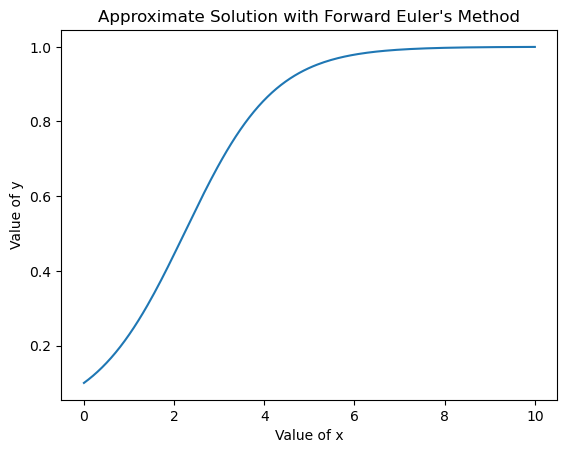

In [2]:
def euler_code(n):
    import numpy as np
    import matplotlib.pyplot as plt
    print("Euler's Method:")
    #Data Input
    x0 = 0
    y0 = 0.1
    xf = 10
    dx = (xf-x0)/(n-1)
    #initialise variables
    x = np.linspace(x0, xf, n)
    y = np.zeros( [n] )
    y[0] = y0
    #main computations
    for i in range(1,n):
        y[i] = y[i-1] + dx*( y[i-1] - y[i-1]*y[i-1] )
    for i in range(n):
        ( x[i], y[i] )
    plt.plot( x, y, '-')
    plt.xlabel("Value of x")
    plt.ylabel("Value of y")
    plt.title("Approximate Solution with Forward Euler's Method")
    plt.show()
euler_code(200)

#### <span style='color:red'> [1.3] Gaussian Elimination with Back Substitution

<img src="pics/algo1.PNG" alt="Drawing" style="width: 600px;margin-center: auto; margin-center: 0;"/>

In [4]:
import numpy as np
import random

def gauss(A,b):
    n = len(A) 
    A = np.hstack((A,b)) #creating n x (n+1) augmented matrix
    icount = 0
    singular = 0
    print("A is: \n", A)
       
    for i in range(0,n-1):                                  #Step 1: Gauss Elimination process
        p = i                                               #Step 2     
        while(p <= n and A[p][i] == 0):                     #A[0][0] = A_{11}, Identify next pivot element
            p = p + 1
        if p == n+1:
            raise ValueError("Matrix is singular") #No unique sol exist
            singular += 1
            break; 
            
        if p != i:                                           #Step 3: row swap
            A[[i,p]] = A[[p,i]] 
            
        for j in range(i+1,n):                               #Step 4
            m = A[j][i]/A[i][i]                              #Step 5: find the multiplier
            icount += 1
            
            for k in range(i,n+1):                           #Step 6: applying row operation
                A[j][k] = A[j][k] - m*A[i][k] 
                icount += 1
        print("Reduced matrix = \n%s" % (A)) 
        
    if A[n-1][n-1] == 0:                                     #Step 7
        raise ValueError("\nMatrix is singular\n")           #No unique sol exist
        singular += 1
    else: 
        x = np.zeros((n,1))                                  #Step 8: back substitution process
        x[n-1] = A[n-1][n]/A[n-1][n-1]
        icount += 1
        
    
        for l in range(n-2,-1,-1):                           #Step 9: default for the range funtion is to count up 
                                                             #        by +1, but we can also go backwards by -1 steps 
                                                             #        which is whats happening here
            Sigma = sum([A[l][j]*x[j] for j in range(l+1,n)] )
            icount = icount + (l+1) 
            x[l] = (A[l][n] - Sigma)/A[l][l]
            icount += 1
        print("\nThe solution is:\n", x)
        print("\nThe number of multiplication/division operations are: ", icount)
    return

In [8]:
a1 = np.array([[1, 1, 1], [0, 1, 1], [0, 0, 5]])
b1 = np.array([[1],[1],[1]])
gauss(a1,b1)

A is: 
 [[1 1 1 1]
 [0 1 1 1]
 [0 0 5 1]]
Reduced matrix = 
[[1 1 1 1]
 [0 1 1 1]
 [0 0 5 1]]
Reduced matrix = 
[[1 1 1 1]
 [0 1 1 1]
 [0 0 5 1]]

The solution is:
 [[0. ]
 [0.8]
 [0.2]]

The number of multiplication/division operations are:  20


#### <span style='color:red'> [1.4] Gauss-Jordan Elimination

<img src="pics/gje.PNG" alt="Drawing" style="width: 600px;margin-center: auto; margin-center: 0;"/>

In [9]:
import numpy as np

def gauss_jordan(A,b):
    n = len(A)
    A = np.hstack((A,b))
    icount=0
    x=np.zeros(n)
    
    for i in range(n):                                   #Step 1: Elimination process
        
        p = i                                            #Step 2      
        while (p <= n-1 and A[p][i] == 0):
            p = p + 1
        if p == n:
            raise ValueError("Matrix A is singular")
            break;
       
        if p != i:                                       #Step 3
            A[[i,p]] = A[[p,i]]
            
        for j in range(0,n):                             #Step 4
            if j!=i:
                
                m = A[j][i]/A[i][i]                      #Step 5
                icount += 2
                
                for k in range(i,n+1):                   #Step 6
                    A[j][k] = A[j][k] - m*A[i][k]
                    icount += 1
        print('\nReduced matrix: \n%s' % (A))

    if A[n-1][n-1] == 0:                                 #Step 7
        raise ValueError("Matrix A is singular") 

    for j in range(0,n):                                 #Step 8
        for i in range(0,j):
            A[i][j] = ( A[i+1][j]*A[i][j] ) - ( A[i][j]*A[i+1][j] )
    
    for i in range(0,n):
        x[i]=A[i][n]/A[i][i]
    print("\nSolution Vector: ", x)
    return

In [10]:
a1 = np.array([[3.33,159,10.3], [2.22,16.7,9.61],[-1.56,5.18,-1.69]])
b1 = np.array([[795],[0.965],[2.71]])
print("Gauss-Jordan Elimination of: \n", np.hstack((a1,b1)))
gauss_jordan(a1,b1)

Gauss-Jordan Elimination of: 
 [[  3.33  159.     10.3   795.   ]
 [  2.22   16.7     9.61    0.965]
 [ -1.56    5.18   -1.69    2.71 ]]

Reduced matrix: 
[[   3.33        159.           10.3         795.        ]
 [   0.          -89.3           2.74333333 -529.035     ]
 [   0.           79.66648649    3.13522523  375.14243243]]

Reduced matrix: 
[[   3.33          0.           15.18454647 -146.95481523]
 [   0.          -89.3           2.74333333 -529.035     ]
 [   0.            0.            5.582613    -96.82128177]]

Reduced matrix: 
[[   3.33          0.            0.          116.39628105]
 [   0.          -89.3           0.         -481.45637511]
 [   0.            0.            5.582613    -96.82128177]]

Solution Vector:  [ 34.95383815   5.39144877 -17.34336266]


#### <span style='color:red'> [1.5] Gaussian Elimination / Gauss-Jordan Hybrid Elimination

<img src="pics/gjh.png" alt="Drawing" style="width: 600px;margin-center: auto; margin-center: 0;"/>

<img src="pics/hybridA.png" alt="Drawing" style="width: 600px;margin-center: auto; margin-center: 0;"/>

In [12]:
import numpy as np

def hybrid(A,b):
    n = len(A)
    A = np.hstack((A,b))
    icount=0
    x=np.zeros(n)
    
    for i in range(n-1):                                     #Step 1: # Elimination process
        p = i

        while p < n-1 and A[p][i] == 0:                      #Step 2
            p = p + 1
        if p == n-1:
            raise ValueError("Matrix A is singular")
            
        if p != i:                                           #Step 3
            A[[i,p]] = A[[p,i]]
            
        for j in range(i+1,n):                               #Step 4
            m = A[j][i]/A[i][i]                              #Step 5
            icount+=2
            
            for k in range(i,n+1):                           #Step 6
                A[j][k] = A[j][k] - m*A[i][k]
                icount+=1
    print(A)
    if A[n-1][n-1] == 0:                                     #Step 7
        raise ValueError("Matrix A is singular")
        
    for i in range(n-1,0,-1):                                #Step 8: Hybrid process, for each i in (n,2), for  
                                                             #        each k in (1,i-1) Rk=Rk-aki/aii * Ri
        for k in range(0,i):                                 #Step 9
            m = A[k][i]/A[i][i]                              #Step 10
            for j in range(i,n+1):
                A[k][j]=A[k][j] - m*A[i][j]                  #Step 11
    print("\n", A)

    for i in range(0,n):                                     #Step 12: back substitution process
        x[i]=str(A[i][n]/A[i][i])                            #Step 13
    print("\nSolution Vector: \n", x)
    return

In [13]:
A2= np.array([[4,-1,1],[2,5,2],[1,2,4,]],float)
b2= np.array([8,3,11],float).reshape(-1,1)

hybrid(A2,b2)

[[ 4.         -1.          1.          8.        ]
 [ 0.          5.5         1.5        -1.        ]
 [ 0.          0.          3.13636364  9.40909091]]

 [[ 4.          0.          0.          4.        ]
 [ 0.          5.5         0.         -5.5       ]
 [ 0.          0.          3.13636364  9.40909091]]

Solution Vector: 
 [ 1. -1.  3.]


#### <span style='color:red'> [1.6] Gaussian Elimination with Partial Pivoting

<img src="pics/gepp.png" alt="Drawing" style="width: 600px;margin-center: auto; margin-center: 0;"/>

In [15]:
import numpy as np
np.set_printoptions(suppress=True)

def gauss_PP(A,b):
    n = len(A)
    A = np.hstack((A,b))
    icount = 0
    sol = np.zeros(n)
    print("Input Matrix: \n",A,"\n")

    for i in range(n-1):                                       #Step 2: Elimination process
        p = i
        max_entry=abs(A[p][i])                                 #Step 3
        while p<n-1:
            p+=1
            if abs(A[p][i])> max_entry:                        #Start with partial pivoting
               max_entry=abs(A[p][i])
               
        if A[p][i]==0:                                         #Step 4
            raise ValueError("No unique solution exist") 
        
        if p != i:                                             #Step 5
            A[[i,p]] = A[[p,i]] 
        
        for j in range(i+1,n):                                 #Step 6
            m = A[j][i]/A[i][i]                                #Step 7
            icount+=2           
            
            for k in range(i+1,n+1):                           #Step 8
                A[j][k] = A[j][k] - m*A[i][k]
                icount+=1
        print(A)
        
    if A[n-1][n-1] == 0:                                       #Step 9
        raise ValueError("Matrix A is singular")
           
    x_n=A[n-1][n]/A[n-1][n-1]                                  #Step 10: back substitution process
    icount+=1
    sol[-1]=x_n
    
    for i in range(n-1,0,-1):                                  #Step 11
        x=A[i-1][n]/A[i-1][i-1]
        icount+=1
        for j in range(i+1,n+1):
            s= ((A[i-1][j-1]*sol[j-1]))/A[i-1][i-1]
            icount+=2
            x -= s
            sol[i-1]=x
    print("\n\nicount =", icount)
    return sol

In [20]:
A1= np.array([[1,1,1],[0,1,1],[0,0,5]],float)

b1=np.array([1,1,1],float).reshape(-1,1)

A3= np.array([[4,-1,1],[2,5,2],[1,2,4,]],float)
b3= np.array([1,1,1],float).reshape(-1,1)

x=gauss_PP(A3,b3)

Input Matrix: 
 [[ 4. -1.  1.  1.]
 [ 2.  5.  2.  1.]
 [ 1.  2.  4.  1.]] 

[[  1.   2.   4.   1.]
 [  2.   1.  -6.  -1.]
 [  4.  -9. -15.  -3.]]
[[  1.           2.           4.           1.        ]
 [  4.          -9.         -15.          -3.        ]
 [  2.           1.          -7.66666667  -1.33333333]]


icount = 23


#### <span style='color:red'> [1.7] Gaussian Elimination with Scaled Partial Pivoting

<img src="pics/ge_spp.png" alt="Drawing" style="width: 600px;margin-center: auto; margin-center: 0;"/>

In [22]:
import numpy as np
np.set_printoptions(suppress=True)

def gaussSPP(A,b):
    n = len(A)
    A = np.hstack((A,b))
    x=[]
    count = 0
    s = np.zeros((n,1)) 
    
    for i in range(n):                                   #Step 1
        s[i] = abs(A[i][0])                              #I changed the 1 to a 0. Verify with lecturer.
        for j in range(1,n):
            count = count +1
            if s[i] <abs(A[i][j]):
                s[i] = abs(A[i][j])
            count+=1    
        
    for i in range(0,n-1):                               #Step 2: Elimination process
        p = i                                            #Step 3 
        
        c = abs(A[i][i])/s[i]
        for j in range(i+1,n):
            count = count + 1
            if abs(A[j][i])/s[j]>c: #I changed the index of s from i to j as we are working in j-th row.
                c = abs(A[j][i])/s[j]#Confirm with lecturer. Verified
                p = j
            count+=1
            
        if c == 0:                                        #Step 4
            raise ValueError("No unique solution exists")
            
        if p != i:                                        #Step 5 
            A[[i,p]] = A[[p,i]]
            s[i],s[p] = s[p],s[i]
                    
        for j in range(i+1,n):                            #Step 6
            m = A[j][i]/A[i][i]                           #Step 7
            count+=1
            for k in range(i,n+1):
                A[j][k] = A[j][k] - m*A[i][k]             #Step 8
                count+=1        

                                
    if A[n-1][n-1] == 0:                                  #Step 9
        raise ValueError("Matrix A is singular")
    else: 
        x.append (A[n-1][n]/A[n-1][n-1])                  #Step 10
        count+=1

        z = (A[(n-2)][(n-1)])*x[0]
        count+=1
        x.append((A[(n-2)][n]-z)/(A[(n-2)][(n-2)]))
        count+=1
        if n>2:
            for q in range(1,n-1):                        #Step 11
                t = 0
                for s in range (0,q+1):
                    t = t + (A[(n-2-q)][(n-1-s)])*x[s]
                    count+=1
                x.append(( A[(n-2-q)][n] - t) /(A[(n-2-q)][(n-2-q)]) )
                count+=1
    x.reverse()
    print("Reduced Matrix: \n", A)  
    print("Solution Vector: ", x)   
    print ("\nOperations Count: ",count)

In [23]:
np.set_printoptions(suppress=True)
m = [[1, -0.999, 1.001],
    [-1.001, 1, 1000],
    [0, 0.00001, 0.00001]]
s = [[0.002],
    [1001],
    [0.00002]]

gaussSPP(m,s)

Reduced Matrix: 
 [[   1.        -0.999      1.001      0.002  ]
 [   0.         0.00001    0.00001    0.00002]
 [   0.         0.      1001.002   1001.002  ]]
Solution Vector:  [1.0928757898653885e-16, 1.0, 1.0]

Operations Count:  38


#### <span style='color:red'> [1.8] Finding nxn matrix inverse

In [24]:
import numpy as np
np.set_printoptions(suppress=True)

def matrix_inverse(A):
    global n
    n = len(A)
    I = np.identity(n) # declare I_n
    A = np.hstack((A,I))
    icount = 0
    s=(n,n)
    C = np.zeros(s)
    print("Augmented Matrix: \n", A)
    
    for i in range(0,n-1):                               #Step 1
        p = i        
        while p < n and A[p][i] == 0:                    #Step 2
            p = p + 1    
        if p == n+1:
            raise ValueError("Matrix is singular.")       
        if p != i:                                       #Step 3
            A[[i,p]] = A[[p,i]]
        
        for j in range(i+1,n):                           #Step 4
            m = A[j][i]/A[i][i]                          #Step 5
            
            for k in range(i+1,2*n):                     #Step 6
                A[j][k] = A[j][k] - m*A[i][k] 
                icount += 1
        print("\nReduced matrix = \n%s" % (A))
        
    if A[n-1][n-1] == 0:                                 #Step 7
        raise ValueError("Matrix is singular.")  
    
    for i in range(n-1,0,-1):                            #Step 8
        for j in range(0,i):                             #Step 9
            m = A[j][i]/A[i][i]                          #Step 10
            for k in range(i+1,2*n):                     #Step 11
                A[j][k] = A[j][k] - m*A[i][k]
                icount += 1
    
    for i in range(0,n):                                 #Step 12
        for j in range(n,2*n):                           #Step 13
            C[i][j-n] = A[i][j]/A[i][i]
            icount+=1
    print (icount)
    return C

In [25]:
np.set_printoptions(suppress=True)
A = np.array([[3,-2,4], [1,0,2], [0,1,0]] )
matrix_inverse(A)

Augmented Matrix: 
 [[ 3. -2.  4.  1.  0.  0.]
 [ 1.  0.  2.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  1.]]

Reduced matrix = 
[[ 3.         -2.          4.          1.          0.          0.        ]
 [ 1.          0.66666667  0.66666667 -0.33333333  1.          0.        ]
 [ 0.          1.          0.          0.          0.          1.        ]]

Reduced matrix = 
[[ 3.         -2.          4.          1.          0.          0.        ]
 [ 1.          0.66666667  0.66666667 -0.33333333  1.          0.        ]
 [ 0.          1.         -1.          0.5        -1.5         1.        ]]
33


array([[ 1. , -2. ,  2. ],
       [ 0. ,  0. ,  1. ],
       [-0.5,  1.5, -1. ]])

#### <span style='color:red'> [1.9] LU Factorization

<img src="pics/LU_F.png" alt="Drawing" style="width: 600px;margin-center: auto; margin-center: 0;"/>

In [26]:
import numpy as np
def LU_fact(A):
    n=len(A)
    L = np.identity(n)
    U = np.identity(n)
                                 
    for i in range(n-1):                                         #Step 1
        p=i
        while p < n-1 and A[p][i] != 0:
            p = p + 1
        if p>n:
            raise ValueError("The input matrix is singular")
        if A[i][i] == 0:
            print("Row interchange required")
        
                                                 
        for j in range(i+1,n):                                    #Step 2
            m=A[j][i]/A[i][i]
            L[j][i]=m                                             #Step 4
            for k in range(i+1,n):
                A[j][k] = A[j][k]-m*A[i][k]
                
    if A[n-1][n-1]==0:
        raise ValueError("The input matrix is singular")
    for i in range(0,n):
        for j in range(i,n):
            U[i][j]=A[i][j]                                        #Step6
    print("L:", L, "\n\nU:", U)

In [27]:
A1= np.array([[2,-1,1],[3,3,9],[3,3,5]],float)

LU_fact(A1)

L: [[1.  0.  0. ]
 [1.5 1.  0. ]
 [1.5 1.  1. ]] 

U: [[ 2.  -1.   1. ]
 [ 0.   4.5  7.5]
 [ 0.   0.  -4. ]]


<img src="pics/luf.png" alt="Drawing" style="width: 500px;margin-center: auto; margin-center: 0;"/>

In [28]:
def forward(L,b):
    n=len(b)
    y=np.zeros(n)
    
    y[0]=b[0]/L[0][0]                                                     #Step 1
    
    for i in range(1,n):                                                  #Step 2
        y[i]=(b[i] - sum(([L[i][j]*y[j] for j in range(0,i)])))/L[i][i]
        
    return (y)      

In [29]:
b = np.array([3,13,4])
L = np.array([[1,0,0],[3,1,0],[2,1,1]])

forward(L,b)

array([ 3.,  4., -6.])

<img src="pics/lub.png" alt="Drawing" style="width: 400px;margin-center: auto; margin-center: 0;"/>

In [30]:
def backward(U,y):
    n=len(y)
    x=np.zeros(n)
    
    x[n-1]=y[n-1]/U[n-1][n-1]                                                          #Step 1
    
    for i in range(n-1,0,-1):                                                          #Step 2
        xa = y[i-1]/U[i-1][i-1]
        x[i-1] = xa-sum(( ((U[i-1][j-1]*x[j-1]))/U[i-1][i-1] for j in range(i+1,n+1)))
    
    return(x)   

In [31]:
U = np.array([[1,2,4],[0,2,2],[0,3,3]])
y = np.array([3,4,-6])

backward(U,y)

array([ 3.,  4., -2.])